In [62]:
# !pip install numpy
# !pip install pandas
# !pip install scipy
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install plotly-express
# !pip install sklearn.preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [63]:
from re import I


data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')

In [64]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link
0,"Aug. 20, 2022","Aug. 20, 2022",Run,1544,13.11000,11065,14.06690,7.71115,4.26534,7.78094,140.0,22531.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6793063441
1,"Aug. 17, 2022","Aug. 17, 2022",Indoor Run / Jog,859,6.56000,3600,9.14634,10.36540,6.56000,5.78848,147.0,9295.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6786805174
2,"Aug. 15, 2022","Aug. 15, 2022",Indoor Run / Jog,632,4.74000,3600,12.65820,10.42180,4.74000,5.75715,122.0,8146.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6781978366
3,"Aug. 14, 2022","Aug. 14, 2022",Run,618,6.38464,4663,12.17350,8.81793,4.92875,6.80432,128.0,11001.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6779701822
4,"Aug. 12, 2022","Aug. 12, 2022",Indoor Run / Jog,831,6.21000,3617,9.70746,9.71231,6.18081,6.17773,144.0,9306.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6775716568


In [65]:
data.shape

(719, 15)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          719 non-null    object 
 1   Workout Date            719 non-null    object 
 2   Activity Type           719 non-null    object 
 3   Calories Burned (kCal)  719 non-null    int64  
 4   Distance (mi)           719 non-null    float64
 5   Workout Time (seconds)  719 non-null    int64  
 6   Avg Pace (min/mi)       719 non-null    float64
 7   Max Pace (min/mi)       719 non-null    float64
 8   Avg Speed (mi/h)        719 non-null    float64
 9   Max Speed (mi/h)        719 non-null    float64
 10  Avg Heart Rate          478 non-null    float64
 11  Steps                   696 non-null    float64
 12  Notes                   719 non-null    object 
 13  Source                  719 non-null    object 
 14  Link                    719 non-null    ob

In [67]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
data.drop(columns=['Link', 'Source', 'Notes'], inplace=True)

In [68]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
0,"Aug. 20, 2022","Aug. 20, 2022",Run,1544,13.11000,11065,14.06690,7.71115,4.26534,7.78094,140.0,22531.0,546
1,"Aug. 17, 2022","Aug. 17, 2022",Indoor Run / Jog,859,6.56000,3600,9.14634,10.36540,6.56000,5.78848,147.0,9295.0,512
2,"Aug. 15, 2022","Aug. 15, 2022",Indoor Run / Jog,632,4.74000,3600,12.65820,10.42180,4.74000,5.75715,122.0,8146.0,458
3,"Aug. 14, 2022","Aug. 14, 2022",Run,618,6.38464,4663,12.17350,8.81793,4.92875,6.80432,128.0,11001.0,509
4,"Aug. 12, 2022","Aug. 12, 2022",Indoor Run / Jog,831,6.21000,3617,9.70746,9.71231,6.18081,6.17773,144.0,9306.0,500


In [69]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            241
Steps                      23
target                      0
dtype: int64

In [70]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,478.000000,696.000000,719.000000
mean,399.834492,3.161285,2077.136300,11.440949,2.089515,5.522974,46.055464,109.052301,5144.096264,271.045897
std,259.565062,2.018472,1292.037301,6.991289,7.690069,1.701102,130.657151,61.824457,3236.581057,150.326921
min,9.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,239.000000,2.008110,1471.000000,9.074935,0.000000,4.973630,0.000000,93.250000,3471.250000,155.500000
50%,403.000000,3.100000,1800.000000,9.744560,0.867689,6.100020,16.039000,143.000000,4681.500000,275.000000
75%,454.500000,3.559340,2348.000000,11.109150,1.569075,6.553425,60.125800,153.000000,5807.250000,386.500000
max,1928.000000,13.481600,11065.000000,123.477000,182.396000,14.863700,1853.550000,169.000000,23604.000000,550.000000


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
d1 = data.sort_values(by='Steps', ascending=False)
d1.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
278,2021-04-14,2021-04-07,Run,1051,7.75998,4668,10.02580,0.000000,5.98458,0.00000,144.0,193886.0,531
300,2020-12-27,2020-11-26,Run,501,3.72999,2196,9.81233,0.000000,6.11475,0.00000,143.0,158654.0,401
422,2020-05-30,2020-05-30,Run,1508,13.43440,8767,10.87400,0.133908,5.51773,448.06700,145.0,23604.0,549
267,2021-04-21,2021-04-21,Run,1928,13.48160,10191,12.59780,0.475306,4.76272,126.23400,144.0,22719.0,550
0,2022-08-20,2022-08-20,Run,1544,13.11000,11065,14.06690,7.711150,4.26534,7.78094,140.0,22531.0,546


<AxesSubplot:xlabel='Activity Type', ylabel='count'>

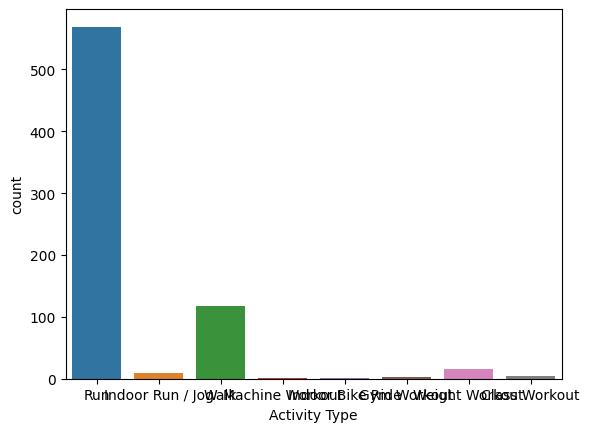

In [37]:
sns.countplot(x='Activity Type', data=data)

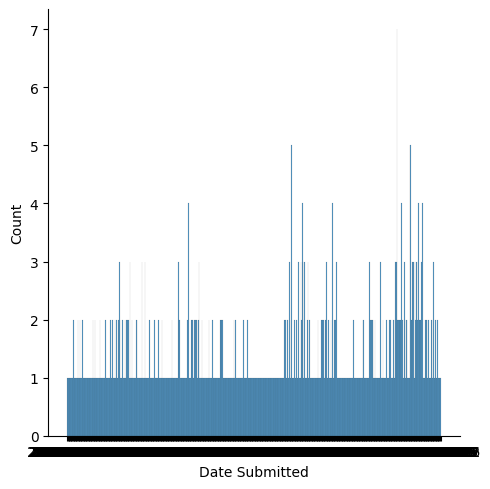

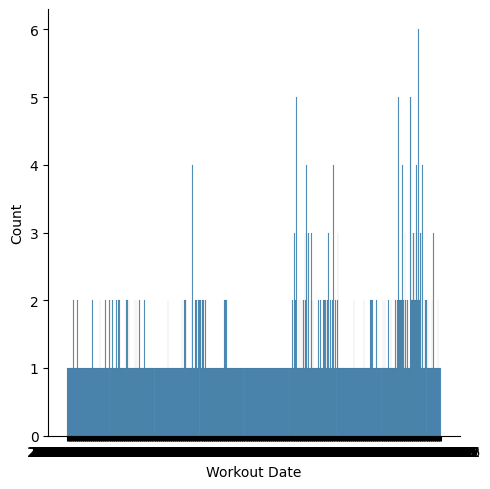

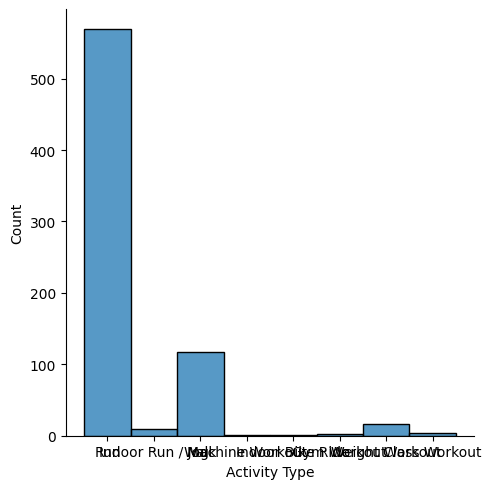

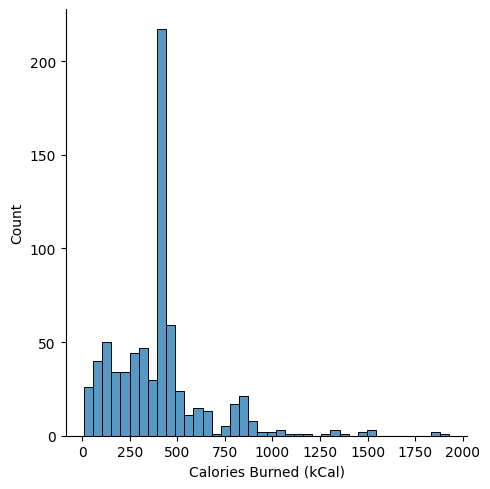

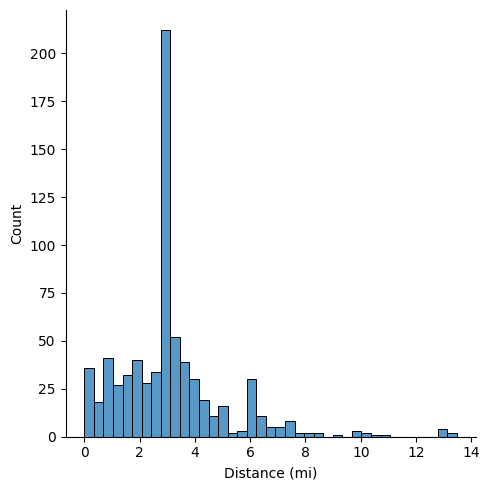

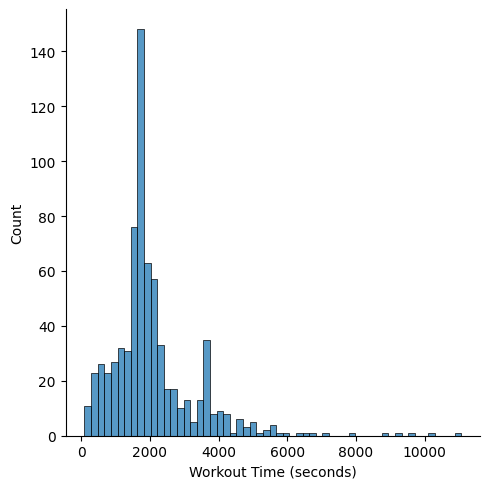

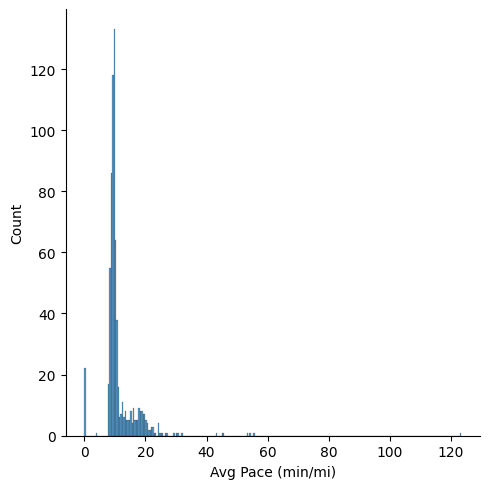

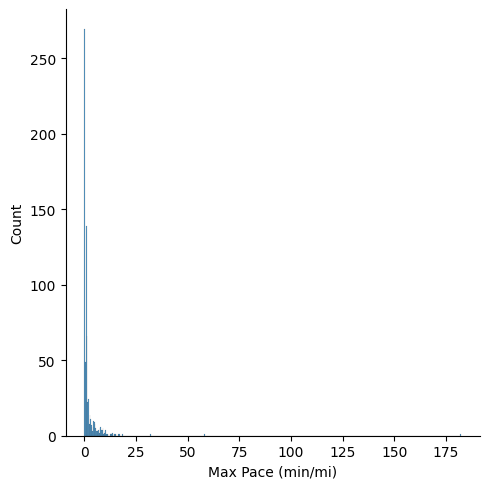

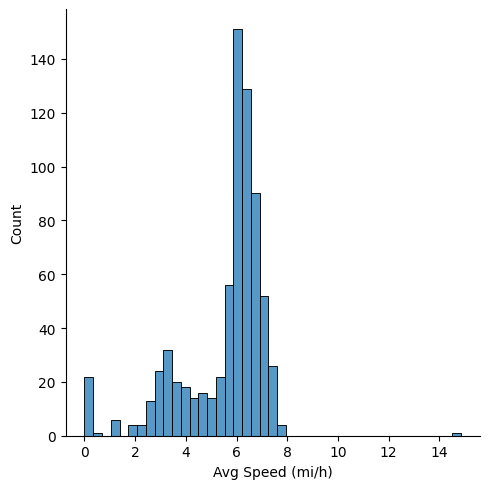

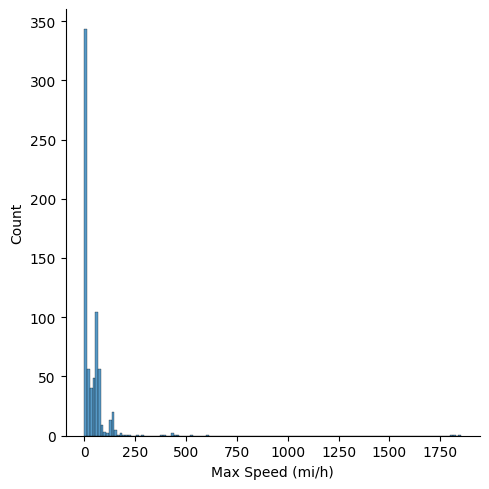

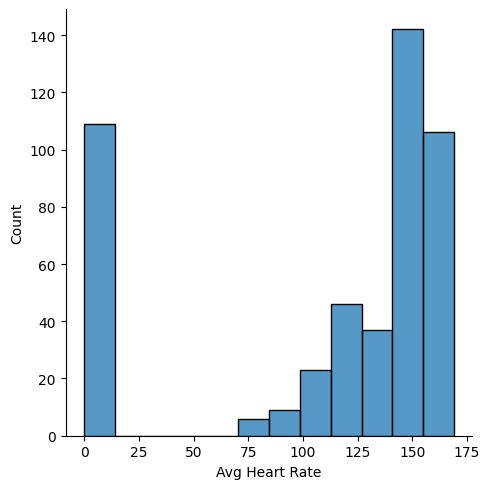

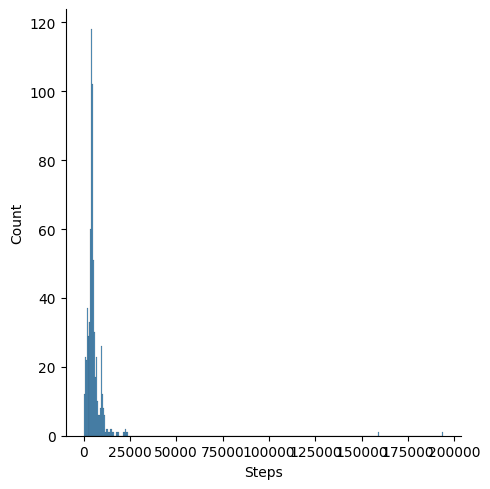

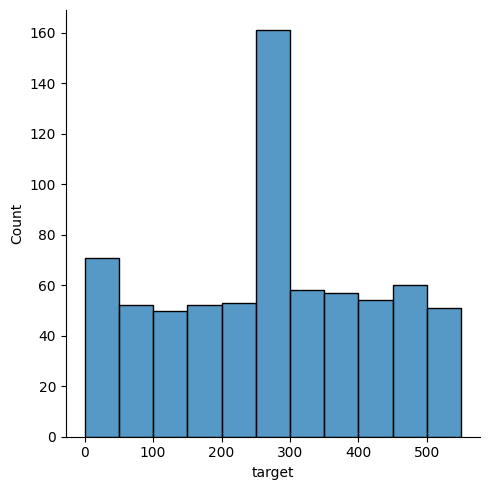

In [38]:
for column in data:
    sns.displot(x=column, data=data)

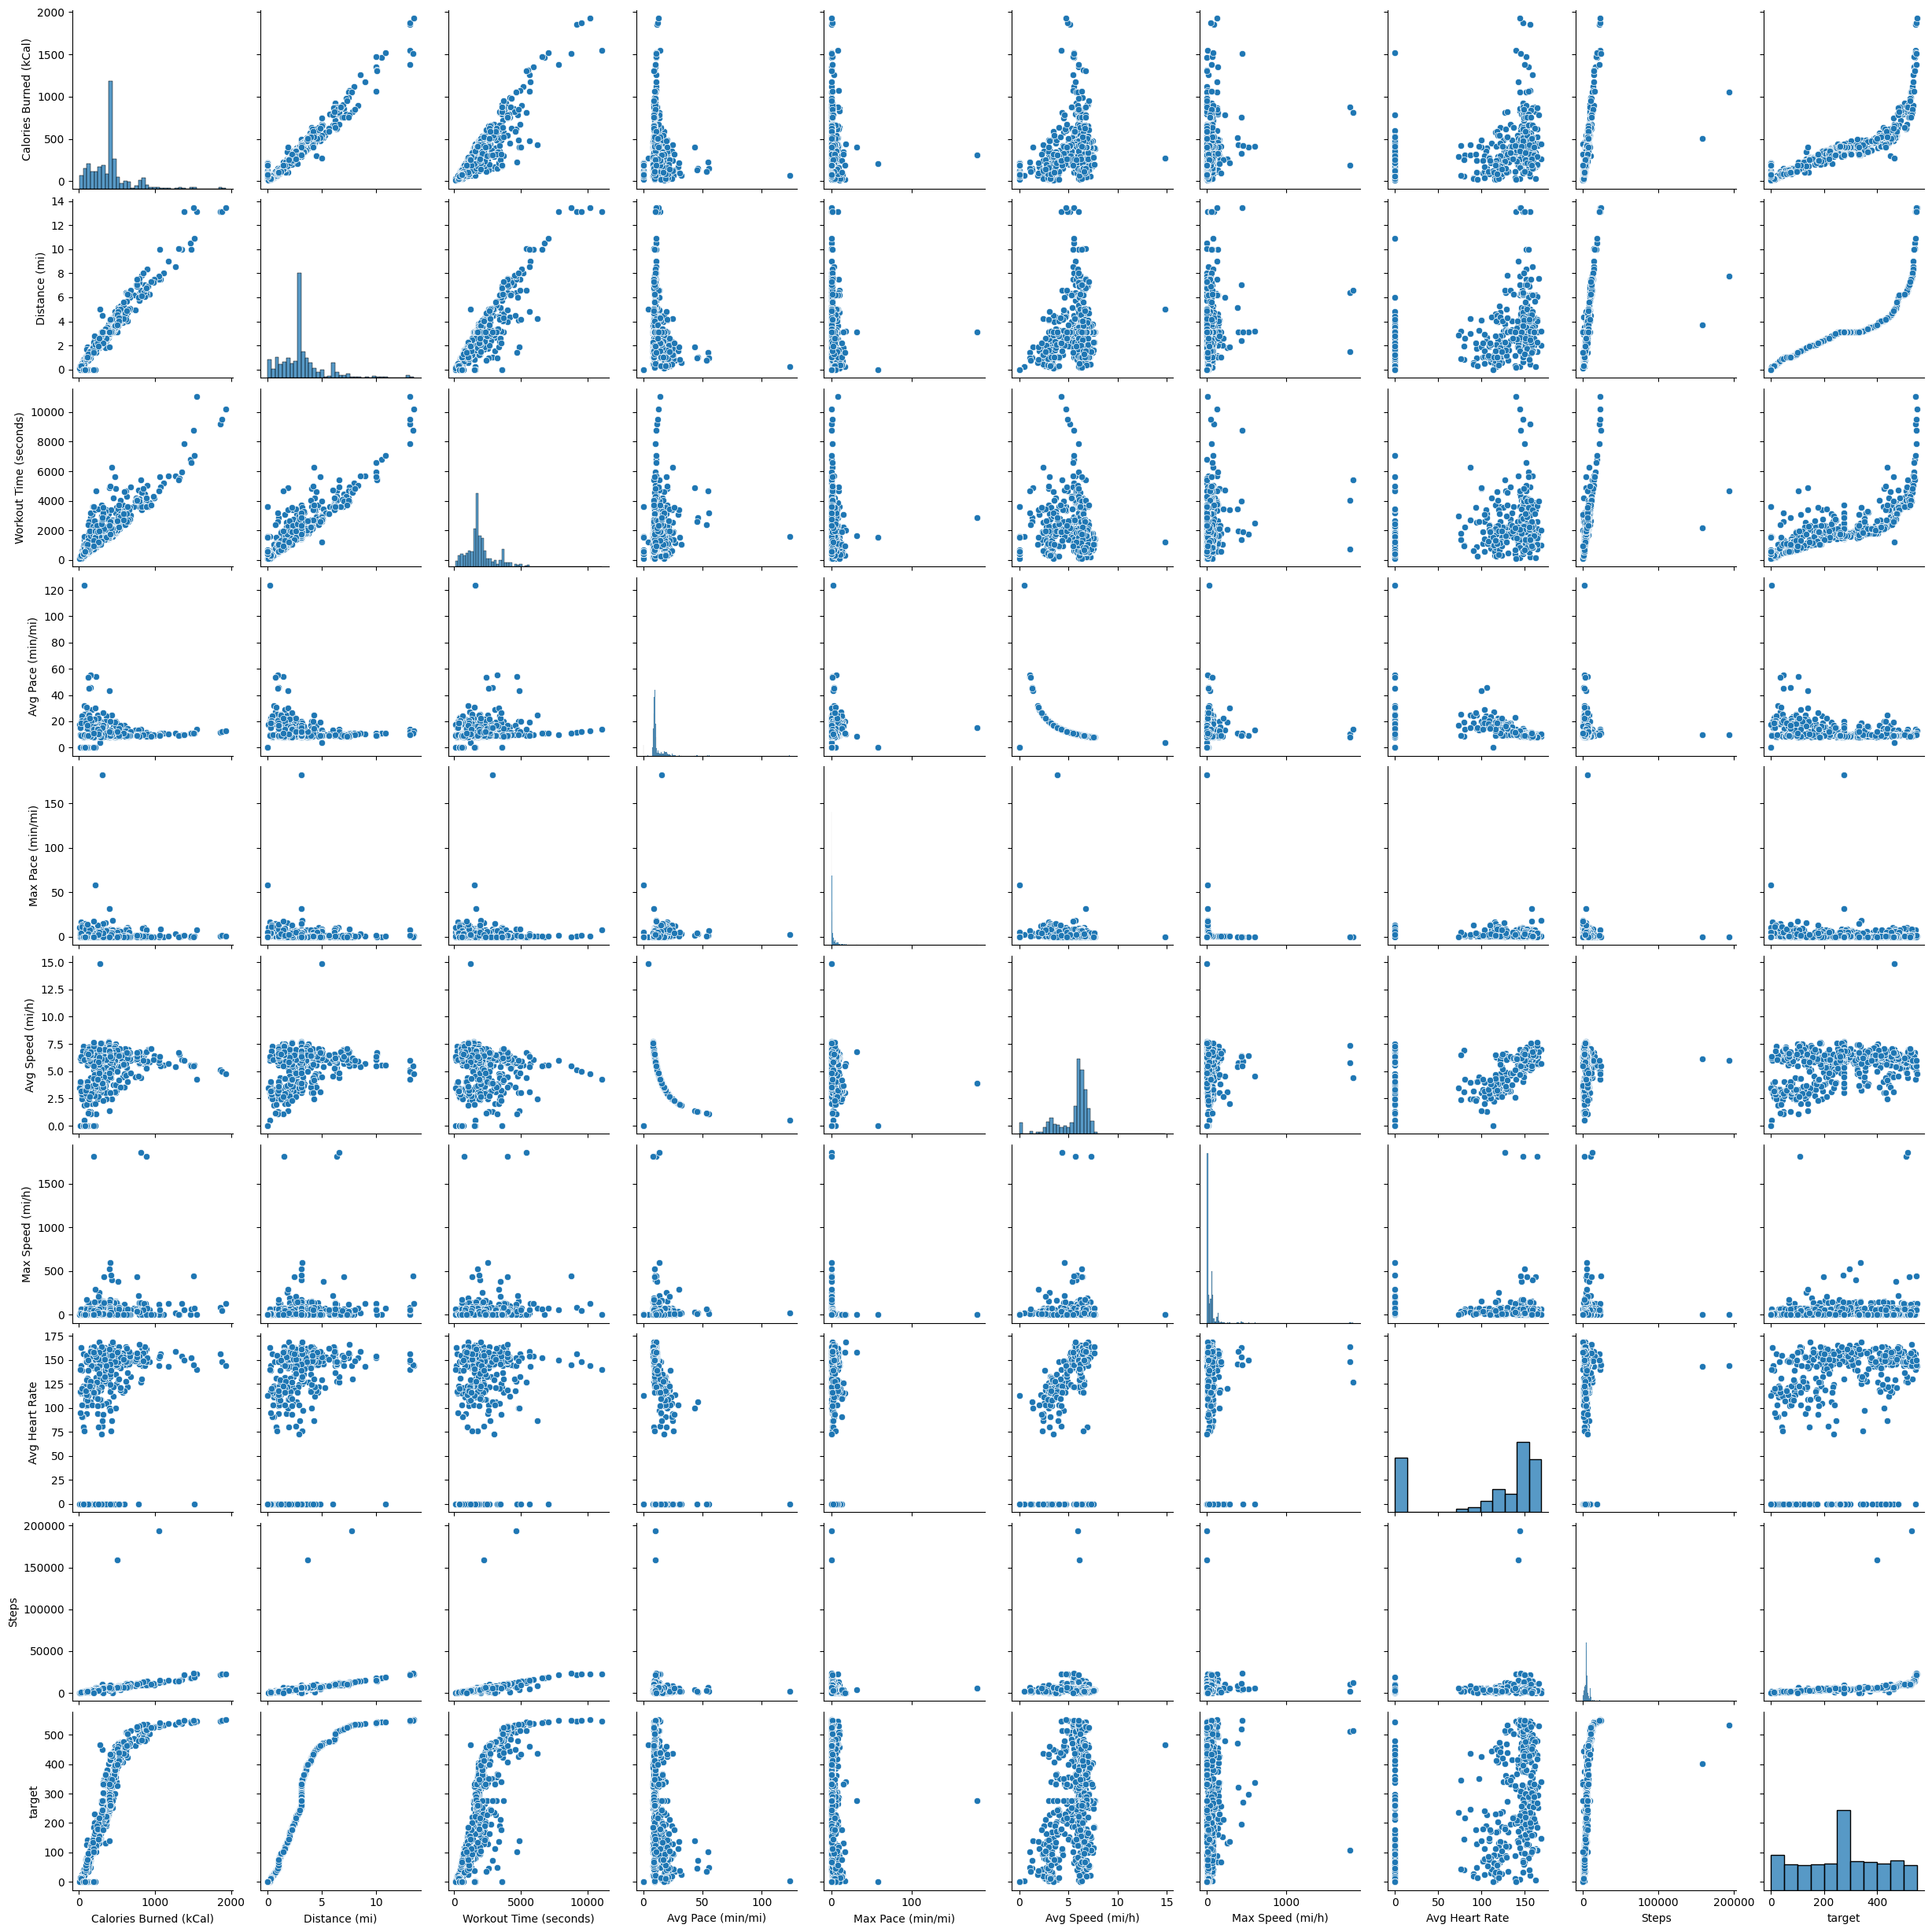

In [39]:
sns.pairplot(data)